In [3]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

import utilities as utl

# Load Raw Data

In [4]:
# load HDF file
dfs = pd.read_hdf('./data/Ballsystem_LegKinematics_DataStructures/P9_BPN/alldata.h5')

In [5]:
# select some fly
n_fly = 2 # 0: BPN, 1: P9 right, 2: P9 left
df = dfs.loc[n_fly, 'flydata']

# some sets of columns
c_xyz = [c for c in df.columns if c[-2:] in ['_x', '_y', '_z']]
c_tag = [ c for c in c_xyz if 'TaG_' in c ]
c_ball = [ 'x_vel', 'y_vel', 'z_vel' ]

leg2step = {
    'R-F': 'R1',
    'R-M': 'R2', 
    'R-H': 'R3',
    'L-F': 'L1',
    'L-M': 'L2', 
    'L-H': 'L3',}

df_raw = df
df_raw

,flynum,tnum,fnum,SF,R-F-ThC_x,R-F-ThC_y,R-F-ThC_z,R-F-CTr_x,R-F-CTr_y,R-F-CTr_z,...,R3D_flex,x_vel,y_vel,z_vel,L1_stepcycle,L2_stepcycle,L3_stepcycle,R1_stepcycle,R2_stepcycle,R3_stepcycle
0,1,1,0,25,0.512781,-0.059520,90.129425,0.360708,0.300253,90.263167,...,152.890039,-0.484678,4.796274e-28,5.826226,True,True,True,True,False,False
1,1,1,1,25,0.512328,-0.058908,90.128075,0.365145,0.298875,90.273223,...,152.549858,0.482418,1.678248e+00,5.630400,True,True,True,True,False,False
2,1,1,2,25,0.510884,-0.058121,90.127967,0.368342,0.298071,90.282739,...,150.999794,1.118539,2.778597e+00,5.430381,True,True,True,True,False,False
3,1,1,3,25,0.508436,-0.057045,90.128902,0.371228,0.298778,90.290147,...,149.650744,1.298492,3.056724e+00,5.219781,True,True,True,True,False,False
4,1,1,4,25,0.505209,-0.055487,90.130446,0.372456,0.301202,90.296125,...,149.566883,1.246395,2.722456e+00,4.982370,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181995,13,10,13995,100,0.830110,-0.081763,90.068229,0.759043,0.324531,90.117033,...,171.880922,-0.800989,1.170721e+00,0.761779,True,True,True,True,True,True
181996,13,10,13996,100,0.830633,-0.082386,90.068170,0.756384,0.322681,90.117266,...,171.945424,-1.211456,1.696038e+00,0.513978,True,True,True,True,True,True
181997,13,10,13997,100,0.831315,-0.083065,90.068013,0.754366,0.320797,90.117446,...,171.890850,-1.482893,2.466001e+00,0.108765,True,True,True,True,True,True
181998,13,10,13998,100,0.832071,-0.083755,90.067785,0.752900,0.318976,90.117516,...,171.828323,-1.728447,3.277642e+00,-0.323407,True,True,True,True,True,True


# Plot stepcycles

In [6]:
ball_c = np.array([-5.17700341e-02 , 3.86083343e+00,  9.06099816e+01])
df_d = utl.dist_from_center(df_raw, ball_c)
df_d

,R-F-ThC,R-F-CTr,R-F-FeTi,R-F-TiTa,R-F-TaG,R-M-ThC,R-M-CTr,R-M-FeTi,R-M-TiTa,R-M-TaG,...,L-M-TiTa,L-M-TaG,L-H-ThC,L-H-CTr,L-H-FeTi,L-H-TiTa,L-H-TaG,R-WH,L-WH,Notum
0,3.989841,3.601132,3.696391,3.337320,3.201807,3.984663,3.702174,4.219671,3.624926,3.214995,...,3.555293,3.217429,3.960811,3.709657,3.978523,3.430832,3.088217,4.412415,4.334618,4.584531
1,3.989337,3.602051,3.695053,3.338629,3.202117,3.984452,3.701150,4.214638,3.621353,3.211965,...,3.549544,3.215137,3.961875,3.709148,3.971038,3.433492,3.117012,4.412352,4.333784,4.584569
2,3.988373,3.602341,3.698674,3.342844,3.204465,3.984329,3.698974,4.206919,3.615655,3.204293,...,3.545524,3.211687,3.961280,3.708948,3.963169,3.433311,3.148574,4.412114,4.333093,4.584633
3,3.986858,3.601313,3.706105,3.349067,3.206953,3.984333,3.695572,4.197820,3.608912,3.194058,...,3.542825,3.207409,3.960238,3.708561,3.955936,3.432349,3.168744,4.412022,4.332572,4.584691
4,3.984689,3.598534,3.711300,3.352337,3.204203,3.984576,3.691466,4.189338,3.602394,3.186752,...,3.539628,3.199685,3.959351,3.707935,3.951410,3.431104,3.176592,4.412245,4.332202,4.584713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181995,4.076183,3.661401,3.722297,3.333922,3.154495,4.087606,3.872870,4.032459,3.464335,3.182085,...,3.481772,3.138892,4.070244,3.773555,4.124375,3.504880,3.137151,4.475925,4.470491,4.710801
181996,4.076907,3.662568,3.730878,3.338374,3.154640,4.087540,3.866583,4.028880,3.461767,3.179052,...,3.484572,3.141511,4.070263,3.774364,4.134472,3.513054,3.140816,4.475904,4.470563,4.710809
181997,4.077733,3.663919,3.737909,3.343678,3.155124,4.087439,3.859105,4.025642,3.459823,3.176812,...,3.487464,3.144350,4.070314,3.775195,4.146225,3.522941,3.141433,4.475896,4.470605,4.710816
181998,4.078594,3.665348,3.744178,3.350778,3.155647,4.087524,3.859104,4.023852,3.459073,3.176070,...,3.489727,3.146504,4.070387,3.775845,4.156097,3.530846,3.138687,4.475998,4.470644,4.710821


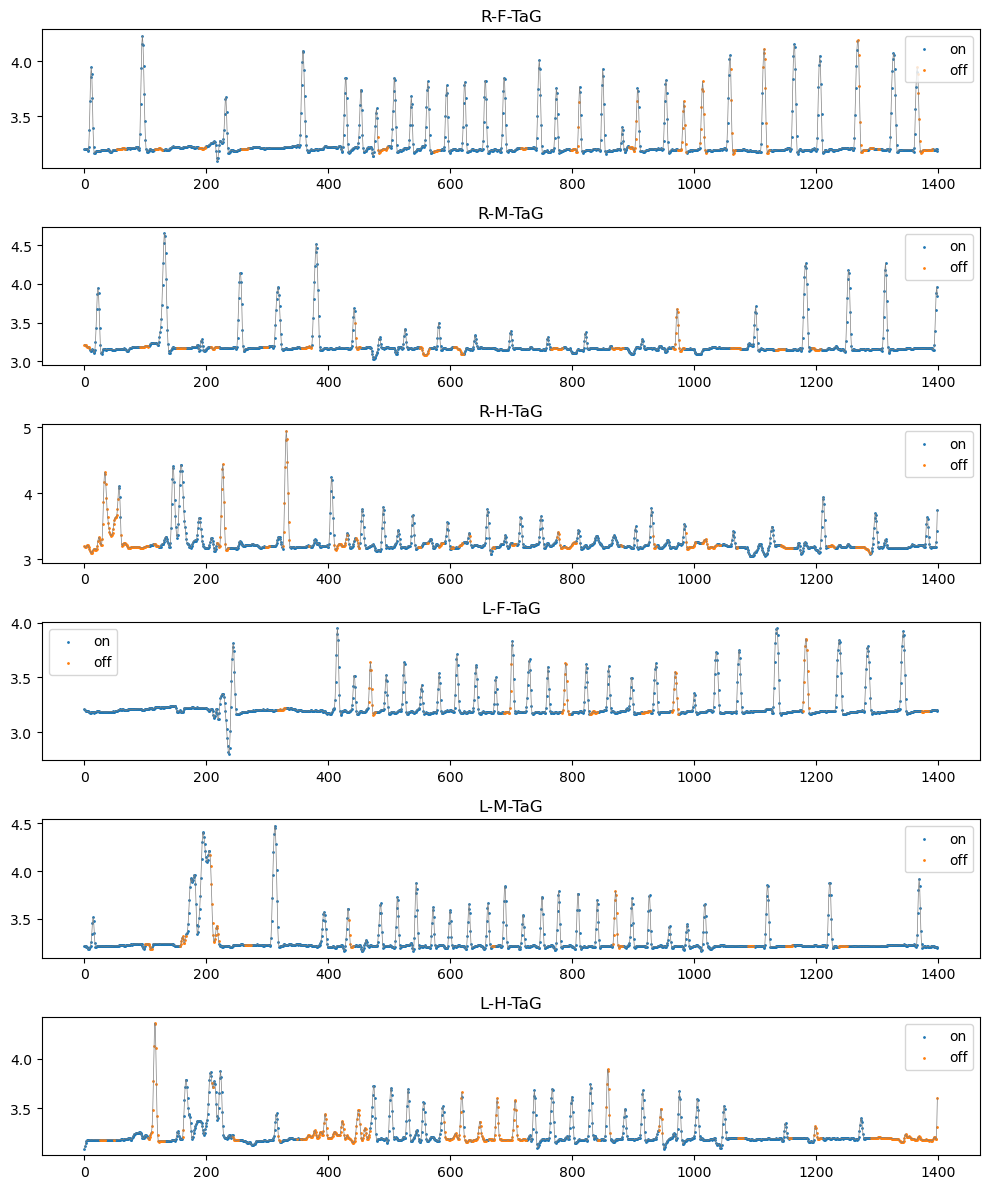

In [16]:
flynum, tnum = 1, 1

df1 = df_raw.groupby('flynum').get_group(1)
df1 = df1.groupby('tnum').get_group(1) # comment this line to look at all trials
df2 = df_d.loc[df1.index, :]

cols = [ c for c in df2.columns if 'TaG' in c ]

n = len(cols)
fig, axarr = plt.subplots(nrows=n, figsize=(10, 2*n))

for c, ax in zip(cols, axarr):

    r = df2.loc[:, c]
    ax.plot(r, lw=0.5, c='gray')

    c_on = '{}_stepcycle'.format(leg2step[c[:3]])
    f_on = df1.loc[:, c_on]

    x = r.loc[f_on]
    ax.scatter(x.index, x.values, s=1, label='on')

    x = r.loc[~f_on]
    ax.scatter(x.index, x.values, s=1, label='off')
    ax.legend()
    ax.set_title(c)

#     ax.set_xlim((500, 1000))

fig.tight_layout()